<a href="https://colab.research.google.com/github/KushagraGoel-arad/Fuzzy-PBL-Script-Recognition-Using-CNN/blob/main/Copy_of_Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/tejasreddy/iam-handwriting-top50")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kushagragoel23
Your Kaggle Key: ··········


100%|██████████| 187M/187M [00:01<00:00, 148MB/s]


In [ ]:
# Create a dictionary to store each form ID and its writer
import os
from itertools import islice

form_writer = {}
forms_file_path = "/content/iam-handwriting-top50/forms_for_parsing.txt"
with open(forms_file_path) as f:
    for line in f:
        line_list = line.split(' ')
        form_id = line_list[0]
        writer = line_list[1]
        form_writer[form_id] = writer
       



 Visualization of dictionary as an Array




In [ ]:
list(form_writer.items())[0:5]

[('a01-000u', '000'),
 ('a01-000x', '001'),
 ('a01-003', '002'),
 ('a01-003u', '000'),
 ('a01-003x', '003')]

There are 221 authors present in the IAM handwriting top-50 dataset but for efficiency and to prevent overfitting we have used 50 most common writers from the dictorary as created above for our PBL

In [ ]:
# Select the 50 most common writer

from collections import Counter

top_writers = []
num_writers = 50
writers_counter = Counter(form_writer.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

The writer id of the top 50 writers taken for our project in form of array:


In [ ]:
print(top_writers[0:5])

['000', '150', '151', '152', '153']


From the 50 most common writers we have selected, we'll now need to select the forms (sentences) they have written:

In [ ]:
top_forms = []
for form_id, author_id in form_writer.items():
    if author_id in top_writers:
        top_forms.append(form_id)

Sentence id or Form id for the top 50 writers:


In [ ]:
print(top_forms[0:5])

['a01-000u', 'a01-003u', 'a01-007u', 'a01-011u', 'a01-014u']


Created arrays of file inputs (a form) and their respective targets (a writer id):


In [ ]:
import numpy as np
import os
import glob

img_files = np.zeros((0), dtype=np.str)
img_targets = np.zeros((0), dtype=np.str)

path_to_files = os.path.join('/content/iam-handwriting-top50/data_subset/data_subset', '*')
for filename in sorted(glob.glob(path_to_files)):
#     print(filename)
    img_files = np.append(img_files, filename)
    file_name, _ = os.path.splitext(filename.split('/')[-1]  )
    parts = file_name.split('-')
    form_id = parts[0] + '-' + parts[1]
    for key in form_writer:
        if key == form_id:
            img_targets = np.append(img_targets, form_writer[form_id])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Visualize the form -> writer id arrays:

In [ ]:
print(img_files[0:5])
print(img_targets[0:5])

['/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-00.png'
 '/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-01.png'
 '/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-02.png'
 '/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s00-03.png'
 '/content/iam-handwriting-top50/data_subset/data_subset/a01-000u-s01-00.png']
['000' '000' '000' '000' '000']


Visualize dataset's images

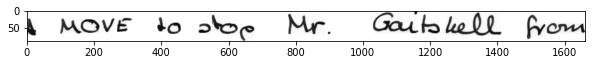

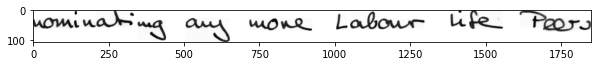

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')

Encode writers with a value between 0 and n_classes-1:

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_img_targets = encoder.transform(img_targets)

print("Writer ID        : ", img_targets[:2])
print("Encoded writer ID: ", encoded_img_targets[:2])

Writer ID        :  ['000' '000']
Encoded writer ID:  [0 0]


Splitting of data into training and validation sets for cross validation with 4:1:1 ratio.



In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(img_files, encoded_img_targets, train_size=0.66,random_state=52, shuffle = True)

# Further split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.5, random_state=22,shuffle = True)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(1616,) (1617,) (1666,)
(1616,) (1617,) (1666,)


Defining constants for the model

In [ ]:
CROP_SIZE = 113
NUM_LABELS = 50
BATCH_SIZE = 16

As suggested in the paper, the input to the model are not unique sentences but rather random patches cropped from each sentence. The get_augmented_sample method is in charge of doing so by resizing each sentence's height to 113 pixels, and its width such that original aspect ratio is maintained. Finally, from the resized image, patches of 113x113 are randomly cropped.

In [ ]:
from sklearn.utils import shuffle
from PIL import Image
import random

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return (images, labels)

For training and testing, generator function is called with the intent of making train and test generator data.

Label:  26


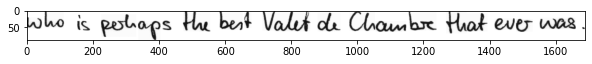

In [ ]:
sample, label = X_train[0], y_train[0]
img = mpimg.imread(sample)
plt.figure(figsize = (10,10))
plt.imshow(img, cmap ='gray')
print("Label: ", label)

In [ ]:
images, labels = get_augmented_sample(sample, label, 0.1)

In [ ]:
print(labels)
print("Num of labels: ", len(labels))

[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
Num of labels:  205


205


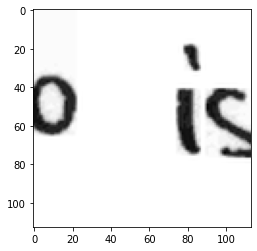

In [ ]:
print(len(images))
plt.imshow(images[0], cmap ='gray')

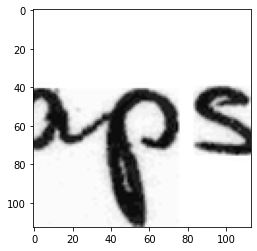

In [ ]:
plt.imshow(images[1], cmap ='gray')

The model uses a generator in order to be able to call get_augmented_sample when training the model:

In [ ]:
import operator
from functools import reduce
from keras.utils import to_categorical

def generate_data(samples, labels, batch_size, sample_ratio):
    while 1: 
        for offset in range(0, len(samples), batch_size):
            batch_samples = samples[offset:(offset + batch_size)]
            batch_labels = labels[offset:(offset + batch_size)]
            
            # Augment each sample in batch
            augmented_batch_samples = []
            augmented_batch_labels = []
            for i in range(len(batch_samples)):
                sample = batch_samples[i]
                label = batch_labels[i]
                augmented_samples, augmented_labels = get_augmented_sample(sample, label, sample_ratio)
                augmented_batch_samples.append(augmented_samples)
                augmented_batch_labels.append(augmented_labels)

            # Flatten out samples and labels
            augmented_batch_samples = reduce(operator.add, augmented_batch_samples)
            augmented_batch_labels = reduce(operator.add, augmented_batch_labels)
            
            # Reshape input format
            X_train = np.array(augmented_batch_samples)
            X_train = X_train.reshape(X_train.shape[0], CROP_SIZE, CROP_SIZE, 1)

            # Transform input to float and normalize
            X_train = X_train.astype('float32')
            X_train /= 255

            # Encode y
            y_train = np.array(augmented_batch_labels)
            y_train = to_categorical(y_train, NUM_LABELS)

            yield X_train, y_train

Create training, validation, and test generators:

In [ ]:
train_generator = generate_data(X_train, y_train, BATCH_SIZE, 0.3)
validation_generator = generate_data(X_val, y_val, BATCH_SIZE, 0.3)
test_generator = generate_data(X_test, y_test, BATCH_SIZE, 0.1)

In [ ]:
import tensorflow as tf


config = tf.compat.v1.ConfigProto
tf.compat.v1.Session()


In [ ]:
def resize_image(img):
    size = round(CROP_SIZE/2)
    return tf.image.resize(img, [size, size])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, Activation
from keras.layers.convolutional import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.optimizers import Adam
from keras import metrics

model = Sequential()

# Define network input shape
model.add(ZeroPadding2D((1, 1), input_shape=(CROP_SIZE, CROP_SIZE, 1)))
# Resize images to allow for easy computation
model.add(Lambda(resize_image)) 

# CNN model - Building the model suggested in paper
model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2, 2), padding='same', name='conv1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3, 3), strides= (1, 1), padding='same', name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool2'))

model.add(Convolution2D(filters= 128, kernel_size =(3, 3), strides= (1, 1), padding='same', name='conv3'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, name='dense1'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='dense2'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(NUM_LABELS, name='output'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 115, 115, 1)      0         
 2D)                                                             
                                                                 
 lambda (Lambda)             (None, 56, 56, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                                        

In [ ]:
from keras.callbacks import ModelCheckpoint
nb_epoch = 5

samples_per_epoch = 3268
nb_val_samples = 842

# #save every model using Keras checkpoint
from keras.callbacks import ModelCheckpoint
#filepath="check-{epoch:02d}-{val_loss:.4f}.hdf5"
filepath="low_loss.hdf5"
checkpoint = ModelCheckpoint(filepath= filepath, verbose=1, save_best_only=False)
callbacks_list = [checkpoint]

# #Model fit generator
history_object = model.fit_generator(train_generator, steps_per_epoch = samples_per_epoch/BATCH_SIZE,
                                      validation_data=validation_generator,
                                      validation_steps=nb_val_samples, epochs=nb_epoch, verbose=1, callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
205/204 [==============================] - ETA: -7s - loss: 3.4714 - acc: 0.2081
Epoch 1: saving model to low_loss.hdf5
204/204 [==============================] - 4676s 23s/step - loss: 3.4714 - acc: 0.2081 - val_loss: 3.1190 - val_acc: 0.2216
Epoch 2/5
205/204 [==============================] - ETA: -7s - loss: 2.8408 - acc: 0.2552
Epoch 2: saving model to low_loss.hdf5
204/204 [==============================] - 4674s 23s/step - loss: 2.8408 - acc: 0.2552 - val_loss: 2.5255 - val_acc: 0.2920
Epoch 3/5
205/204 [==============================] - ETA: -7s - loss: 2.4263 - acc: 0.3159
Epoch 3: saving model to low_loss.hdf5
204/204 [==============================] - 4703s 23s/step - loss: 2.4263 - acc: 0.3159 - val_loss: 2.1256 - val_acc: 0.3765
Epoch 4/5
205/204 [==============================] - ETA: -8s - loss: 2.1307 - acc: 0.3759
Epoch 4: saving model to low_loss.hdf5
204/204 [==============================] - 4892s 24s/step - loss: 2.1307 - acc: 0.3759 - val_loss: 1.9847 - 